<a href="https://colab.research.google.com/github/hugol1212/Fundamentos/blob/main/pr%C3%A1ctica3_3_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cvxpy as cp
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



In [4]:
import cvxpy as cp
import numpy as np

# Resolver SVM con CVXPY (soft-margin)
def solve_svm_with_cvxpy(X, y, C=1.0):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()  # etiquetas en {-1, +1}

    n_samples, n_features = X.shape

    # Variables
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(n_samples)

    # Definir el problema: (1/2)||w||^2 + C * sum(xi)
    objective = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))

    # Restricciones: y_i (w^T x_i + b) >= 1 - xi_i,  xi_i >= 0
    constraints = [
        cp.multiply(y, X @ w + b) >= 1 - xi,
        xi >= 0
    ]

    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.SCS)

    return w.value, b.value, xi.value


In [10]:
from sklearn.svm import SVC
import numpy as np

# Resolver SVM con sklearn (lineal)
def solve_svm_with_sklearn(X, y, C=1.0):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()  # etiquetas en {-1, +1}

    # SVM lineal
    clf = SVC(kernel="linear", C=C)
    clf.fit(X, y)

    w = clf.coef_[0]
    b = clf.intercept_[0]

    return w, b
from sklearn.svm import LinearSVC
import numpy as np

def solve_svm_l1_with_sklearn(X, y, C=1.0):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()

    clf = LinearSVC(
        penalty="l1",
        loss="squared_hinge",
        C=C,
        dual=False,
        max_iter=10000
    )
    clf.fit(X, y)

    w = clf.coef_[0]
    b = clf.intercept_[0]
    return w, b



In [5]:
# Generar datos sintéticos
X, y = make_classification(n_samples=50, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)
y = 2 * y - 1  # Convertir etiquetas a {-1, 1}

In [7]:
# Calcular solución con CVXPY
C = 1.0
w_cvx, b_cvx, xi_cvx = solve_svm_with_cvxpy(X, y, C)

# Calcular solución con sklearn
w_sklearn, b_sklearn = solve_svm_with_sklearn(X, y, C)


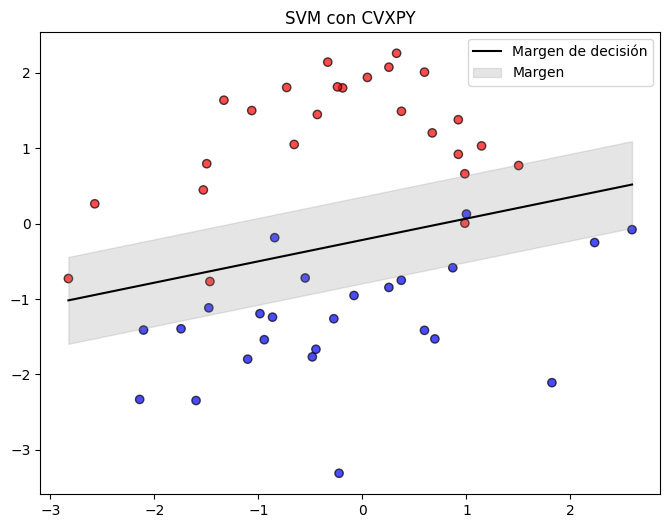

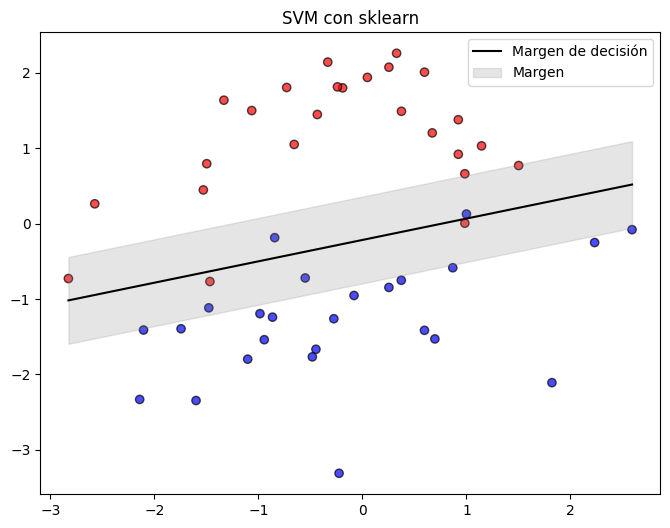

In [8]:
# Visualizar resultados
def plot_svm(X, y, w, b, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolor='k')
    x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_line = -(w[0] * x_line + b) / w[1]
    plt.plot(x_line, y_line, 'k-', label="Margen de decisión")
    plt.fill_between(x_line, y_line - 1/np.linalg.norm(w), y_line + 1/np.linalg.norm(w), color='gray', alpha=0.2, label="Margen")
    plt.title(title)
    plt.legend()
    plt.show()

# Visualización con CVXPY
plot_svm(X, y, w_cvx, b_cvx, title="SVM con CVXPY")

# Visualización con sklearn
plot_svm(X, y, w_sklearn, b_sklearn, title="SVM con sklearn")

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target
y = 2 * y - 1

# Crear un DataFrame para exploración
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Mostrar primeras filas
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [11]:
# Calcular solución con sklearn

# Estandarizar antes (muy importante)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w_l2, b_l2 = solve_svm_with_sklearn(X_scaled, y, C=1.0)
w_l1, b_l1 = solve_svm_l1_with_sklearn(X_scaled, y, C=1.0)

print("Coeficientes no nulos L2:", np.sum(np.abs(w_l2) > 1e-6))
print("Coeficientes no nulos L1:", np.sum(np.abs(w_l1) > 1e-6))




Coeficientes no nulos L2: 30
Coeficientes no nulos L1: 20


In [12]:
# Calcular solución con CVXPY
# Calcular solución con CVXPY (SVM soft-margin con L2)

import numpy as np
import cvxpy as cp
from sklearn.preprocessing import StandardScaler

# Estandarizar X (muy importante para estabilidad y comparación)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C = 1.0
w_cvx, b_cvx, xi_cvx = solve_svm_with_cvxpy(X_scaled, y, C)

print("Norma w (CVX):", np.linalg.norm(w_cvx))
print("Slack > 0:", np.sum(xi_cvx > 1e-6))
print("Slack max:", np.max(xi_cvx))





Norma w (CVX): 3.0660159678723775
Slack > 0: 26
Slack max: 4.537829630104355


                model    ||w||2  #nonzero(|w|>1e-6)
0  SVM L1 (LinearSVC)  2.732360                  20
1  SVM L2 (LinearSVC)  2.955044                  30
2    SVM (SVC linear)  3.066906                  30

Top-10 features (L1):
                   feature         w       |w|
0               worst area -1.793950  1.793950
1             radius error -0.875244  0.875244
2  fractal dimension error  0.755504  0.755504
3      mean concave points -0.746657  0.746657
4         mean compactness  0.729465  0.729465
5            worst texture -0.723394  0.723394
6  worst fractal dimension -0.554194  0.554194
7           mean concavity -0.520067  0.520067
8     concave points error -0.449221  0.449221
9          worst concavity -0.376886  0.376886

Top-10 features (L2):
                   feature         w       |w|
0               worst area -1.020159  1.020159
1               area error -0.923033  0.923033
2  fractal dimension error  0.885834  0.885834
3         mean compactness  0.836876  0.8

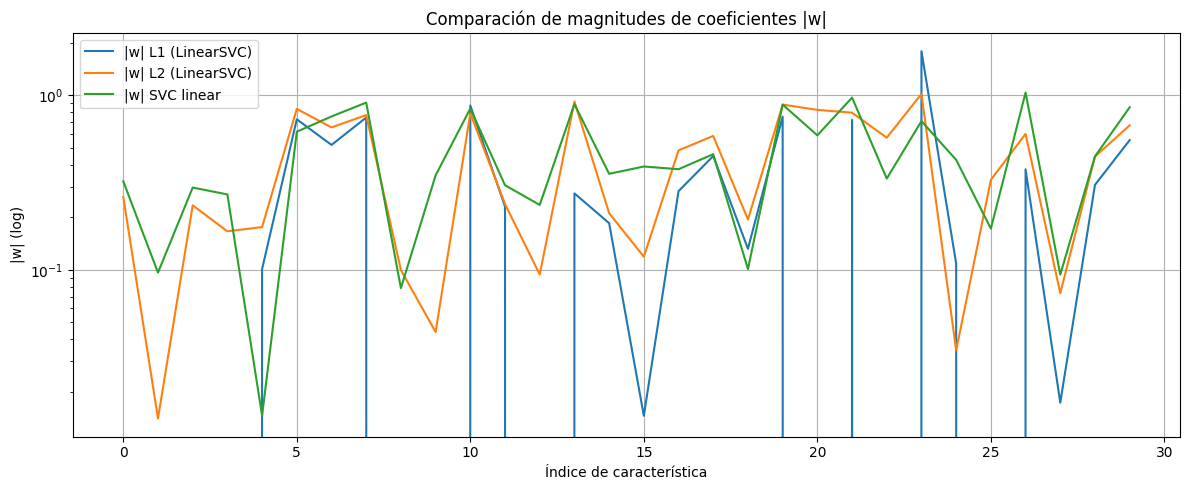

In [13]:
# Analizar los coeficientes w para i)SVM con L1 ii) SVM con L2 y iii) SVM con sklearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

# -----------------------
# 1) Escalado
# -----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = data.feature_names  # del load_breast_cancer()
thr = 1e-6
C = 1.0

# -----------------------
# 2) Modelos
# -----------------------
# i) SVM L1
svm_l1 = LinearSVC(penalty="l1", loss="squared_hinge", C=C, dual=False, max_iter=20000)
svm_l1.fit(X_scaled, y)
w_l1 = svm_l1.coef_[0]

# ii) SVM L2
svm_l2 = LinearSVC(penalty="l2", loss="squared_hinge", C=C, dual=True, max_iter=20000)
svm_l2.fit(X_scaled, y)
w_l2 = svm_l2.coef_[0]

# iii) SVM sklearn (SVC lineal)
svm_svc = SVC(kernel="linear", C=C)
svm_svc.fit(X_scaled, y)
w_svc = svm_svc.coef_[0]

# -----------------------
# 3) Métricas de comparación
# -----------------------
summary = pd.DataFrame({
    "model": ["SVM L1 (LinearSVC)", "SVM L2 (LinearSVC)", "SVM (SVC linear)"],
    "||w||2": [np.linalg.norm(w_l1), np.linalg.norm(w_l2), np.linalg.norm(w_svc)],
    "#nonzero(|w|>1e-6)": [np.sum(np.abs(w_l1) > thr), np.sum(np.abs(w_l2) > thr), np.sum(np.abs(w_svc) > thr)]
})

print(summary)

# -----------------------
# 4) Top-10 features por |w| (por modelo)
# -----------------------
def top_features(w, names, k=10):
    idx = np.argsort(np.abs(w))[::-1][:k]
    return pd.DataFrame({
        "feature": np.array(names)[idx],
        "w": w[idx],
        "|w|": np.abs(w[idx])
    })

print("\nTop-10 features (L1):")
print(top_features(w_l1, feature_names, 10))

print("\nTop-10 features (L2):")
print(top_features(w_l2, feature_names, 10))

print("\nTop-10 features (SVC linear):")
print(top_features(w_svc, feature_names, 10))

# -----------------------
# 5) Gráfica comparativa de |w|
# -----------------------
plt.figure(figsize=(12,5))
plt.plot(np.abs(w_l1), label="|w| L1 (LinearSVC)")
plt.plot(np.abs(w_l2), label="|w| L2 (LinearSVC)")
plt.plot(np.abs(w_svc), label="|w| SVC linear")
plt.yscale("log")
plt.xlabel("Índice de característica")
plt.ylabel("|w| (log)")
plt.title("Comparación de magnitudes de coeficientes |w|")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
